In [1]:
%matplotlib notebook
import numpy as np
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
from glob import glob
from tqdm.auto import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from scipy import stats

import IPython

from matplotlib.animation import ArtistAnimation


%matplotlib inline
# All imports

from random import choice
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display

In [3]:
eboss = Table.read('silo_eboss_detections-1.0.1.fits').to_pandas()

In [4]:
flux_li = []

for item in eboss.sample(25)['FLUX'].values:
    #print(item.shape)
    flux_li.append(item[:4500].reshape(1, item[:4500].shape[0]))
    #print(item.reshape(1, item.shape[0]).shape)
flux_sample = np.concatenate((flux_li))
X = flux_sample.copy()

In [5]:
flux_re = []

for item in eboss.sample(25)['RESIDUAL_FLUX'].values:
    #print(item.shape)
    flux_re.append(item[:4500].reshape(1, item[:4500].shape[0]))
    #print(item.reshape(1, item.shape[0]).shape)
flux_sample_re = np.concatenate((flux_re))
Xre = flux_sample_re.copy()

In [6]:
def init_pca(X, n_comp):
    pca = PCA(n_comp, svd_solver='full')
    Xproj =pca.fit_transform(X)
    pca_comps = pca.components_
    return pca, Xproj, pca_comps

In [7]:
#Eigenimages
def show_eigen_spectra(Xproj, pca_comps, let_idx=0, dim = 16):
    fig, axes = plt.subplots(1, pca_comps.shape[0])
    fig.set_size_inches(30, 5)
    coeffs = (Xproj[let_idx])
    for i in range(pca_comps.shape[0]):    
#         plt.plot((coeffs[i]*pca_comps[i]))
#         plt.title(str(i)+'. Coeff: '+str(coeffs[i])) 
#         print('Eigen Spectra '+str(i),'Coeff: '+str(coeffs[i]))
#         plt.show()
        axes[i].plot(coeffs[i]*pca_comps[i]+pca.mean_)
        axes[i].axis('off')
    print(let_idx)
    print('Coeffs', coeffs)    
    plt.show()

In [8]:
def show_pca_spectra(Xproj, pca_comps, let_idx = 0, dim = 16):
    show_eigen_spectra(Xproj, pca_comps, let_idx)
    rec_let = np.zeros((1, 4500))
    coeffs = (Xproj[let_idx])
    ims = []
    fig = plt.figure()
    for i in range(pca_comps.shape[0]):
        #linear combination
        rec_let += coeffs[i]*pca_comps[i]#.reshape((1, 4500))
#         ax = plt.subplot(111)
#         ax.axis('off')
#         ax.imshow(rec_let)
#         plt.show()
#     fig, ax = plt.subplot(1, 1)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.imshow(rec_let+pca.mean_)
    plt.show()

In [9]:
def rec_letFun(Xproj, pca_comps, let_idx = 0, dim = 16):
    rec_let = np.zeros((1, 4500))
    coeffs = (Xproj[let_idx])
    rec_let0 = coeffs[0]*pca_comps[0] 
    for i in range(pca_comps.shape[0]):
        #linear combination
        rec_let += coeffs[i]*pca_comps[i]
    return rec_let + pca.mean_

In [10]:
import IPython
n_comp = 25
pca, Xproj, pca_comps = init_pca(X, n_comp)

In [26]:
X.mean(axis=0)

array([ 0.756912  , -0.87996995,  1.4265758 , ...,  2.874574  ,
        2.5783257 ,  2.321086  ], dtype=float32)

In [44]:
# X_new = X.T
# rec_mean = np.zeros((1, 4500))

# for i in range(4500):
#     temp=0
#     for j in range(25):
#         temp+=X_new[i][j]/25
#     rec_mean[0][i]=temp
# Xmean = rec_mean[0]

In [11]:
Xmean=X.mean(axis=0)

In [12]:
PCAmean = pca.mean_ #== zeroth component

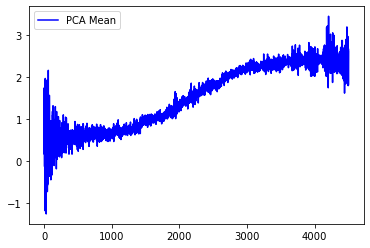

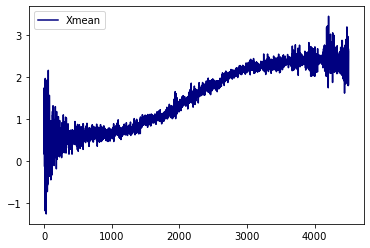

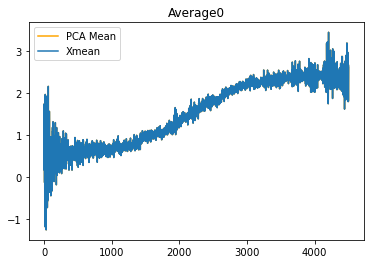

In [23]:
plt.plot(PCAmean,label='PCA Mean', c='blue')
plt.legend()
plt.show()


plt.plot(Xmean, label='Xmean', c='navy')
plt.legend()
plt.show()
i=0
plt.title('Average'+str(i))
plt.plot(PCAmean,label='PCA Mean', c='orange')
plt.plot(Xmean, label='Xmean')
plt.legend()
plt.show()

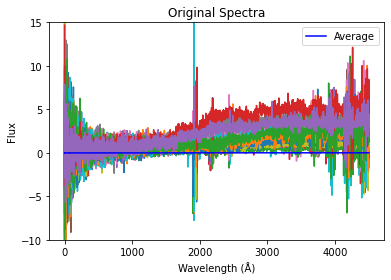

In [21]:
for i in range(25):
    plt.plot(X[i])
#     plt.plot(pca_comps[0])
    plt.title('Original Spectra')
    plt.ylabel('Flux')
    plt.xlabel('Wavelength (Å)')
    plt.ylim(-10, 15)
plt.plot(Xmean, c='b', label='Average')
plt.legend()
plt.show()

0
Coeffs [-2.02106500e+00 -4.14955521e+00 -2.24876142e+00 -1.53224430e+01
  2.01123810e+00 -3.68683124e+00  1.52828197e+01  1.35190325e+01
 -1.75630379e+01 -1.49415741e+01 -1.36034470e+01  3.71780062e+00
  1.77203484e+01  1.08278580e+01  2.38729115e+01 -7.55282581e-01
 -1.07610931e+01 -6.61358023e+00 -2.51895356e+00  3.54302073e+00
 -1.23391247e+00  5.88009024e+00  2.90605855e+00 -1.26137388e+00
  8.67725976e-06]


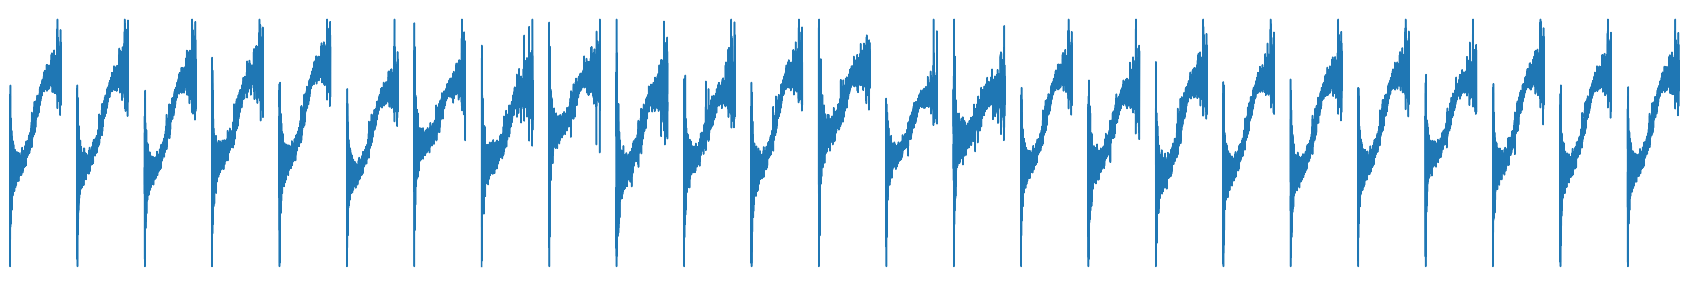

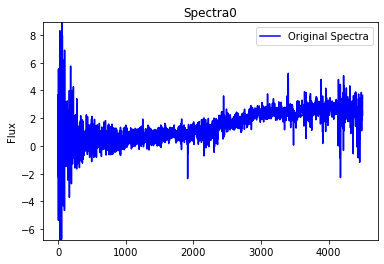

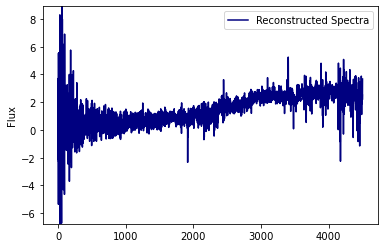

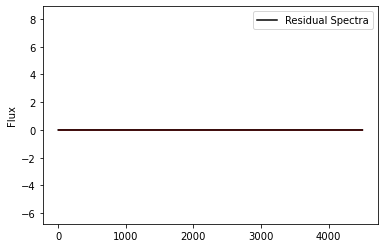

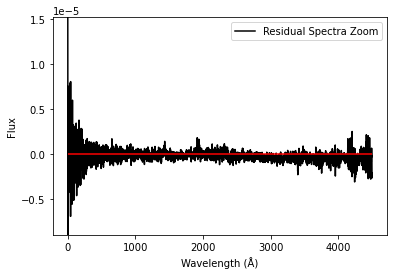

1
Coeffs [ 2.6617578e-01 -2.5509338e+01  6.0766613e+01  3.9029713e+01
  2.1346962e+01 -2.7779710e+00  6.5223759e-01 -2.9521043e+00
 -1.1413584e+00 -8.9456825e+00 -2.1587842e+00  3.8035393e+00
  3.7873070e+00 -2.1609788e-01 -1.9491209e+00  3.2711652e-01
  1.3466487e+00  2.6681805e+00 -2.9779425e+00  1.4294549e+00
  2.5409263e-01  1.4029449e+00  1.0391237e+00  4.8826303e-02
  8.6772552e-06]


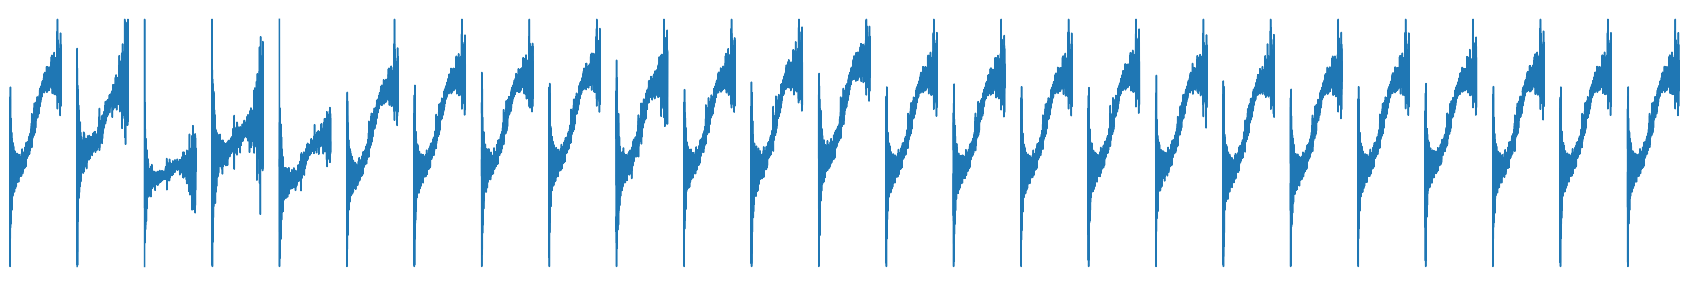

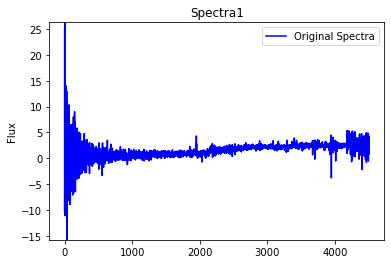

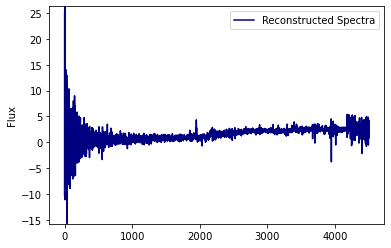

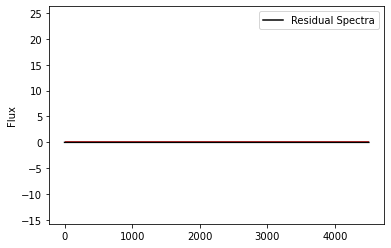

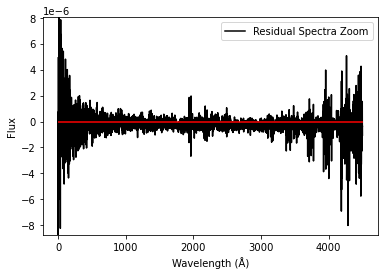

2
Coeffs [-5.3475975e+01  1.7879981e+00  9.6813935e-01 -3.6098592e+00
 -5.4629669e+00 -3.3947675e+00 -4.2607770e+00 -3.7613872e-01
  4.7069950e+00  5.0326920e-01  4.3625875e+00 -1.8088392e+01
  9.0108991e-01  2.5395095e+00  8.0600977e+00 -1.0266503e+01
  4.2282195e+00  2.9445162e+01  9.1488876e+00  4.1476331e+00
 -1.1345496e+01  9.3395271e+00  5.6276860e+00 -6.1221328e+00
  8.6772643e-06]


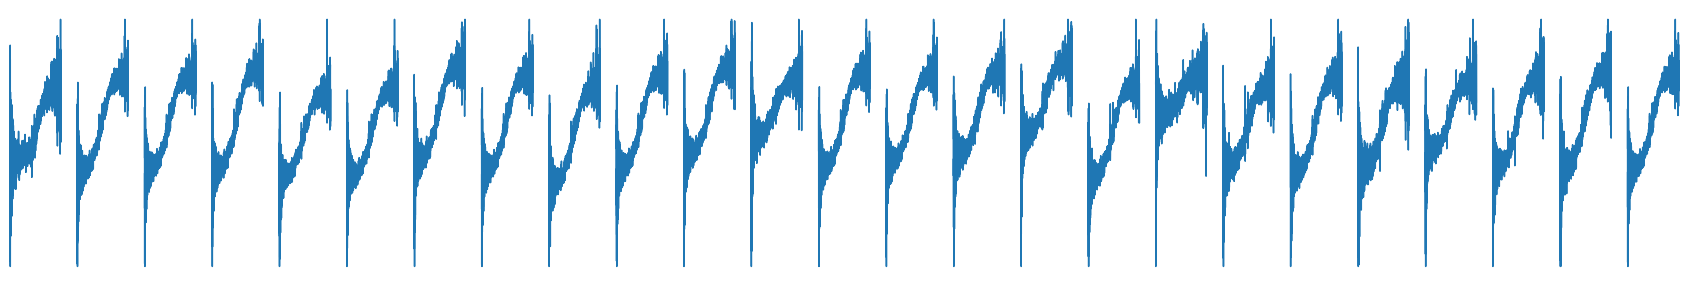

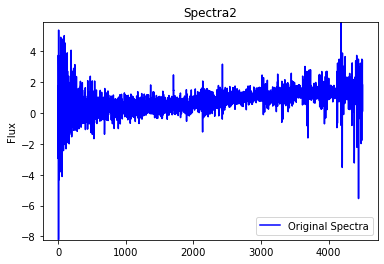

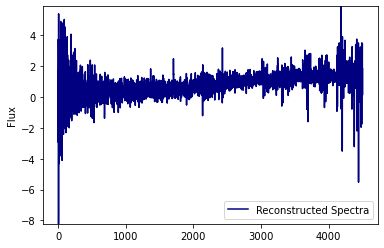

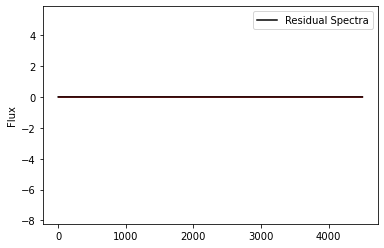

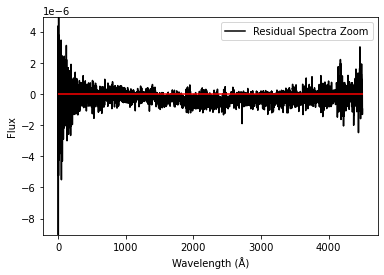

3
Coeffs [-2.7055641e+01  2.7174559e-01  5.2336860e+00 -9.8441591e+00
 -2.1672018e+00 -4.6614590e+00 -3.5880764e+00  2.5744107e+00
 -2.3198152e+00 -3.0601077e+00 -6.0260658e+00 -1.0641054e+01
 -6.9245062e+00  4.5296912e+00 -9.5723877e+00  2.4589534e+00
 -8.6416607e+00  4.5870266e+00  9.4295397e+00  9.6013756e+00
  3.0446941e+01  7.2990341e+00 -6.4737582e+00  3.0118666e+00
  8.6772616e-06]


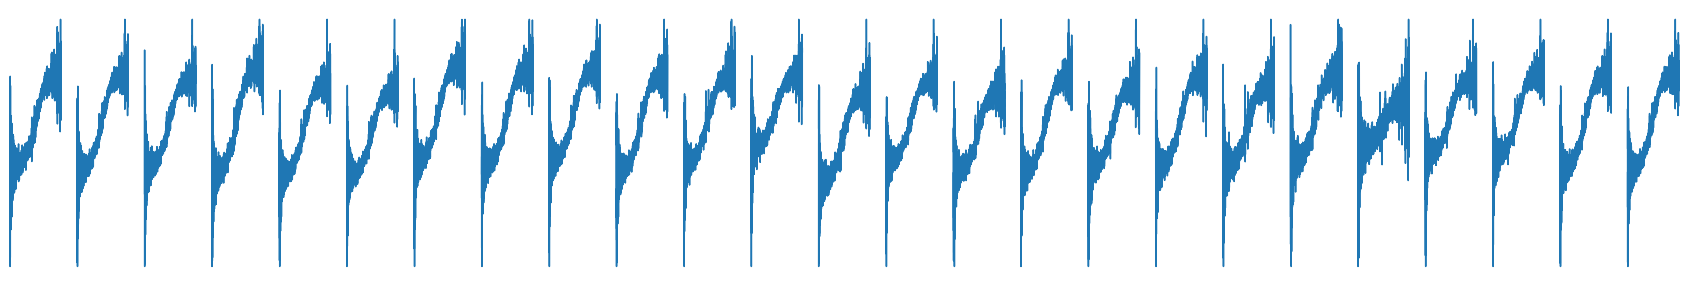

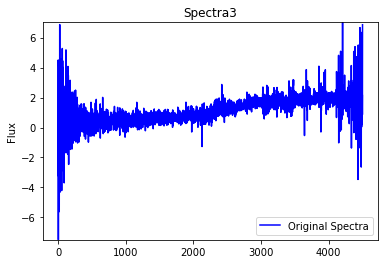

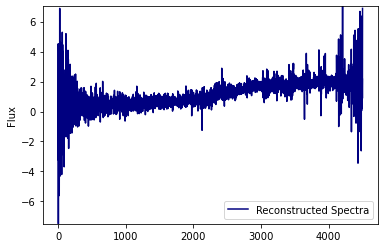

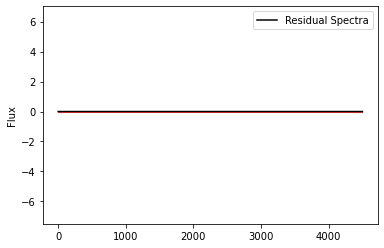

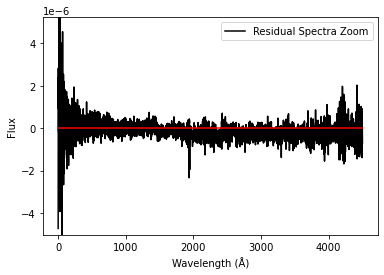

4
Coeffs [ 2.25038940e+02  7.73229456e+00 -1.18927348e+00 -5.31869841e+00
  4.40815353e+00  4.25275841e+01 -2.16109238e+01 -2.07247400e+00
  1.24817038e+01 -1.19797125e+01 -1.00274391e+01  3.06192851e+00
  2.83362269e+00  8.89026356e+00 -2.67093986e-01  3.19503379e+00
  4.85815167e-01  1.93809414e+00  3.14355779e+00 -2.88207698e+00
 -1.66735673e+00 -3.25018436e-01 -1.95478809e+00 -9.27881062e-01
  8.67726067e-06]


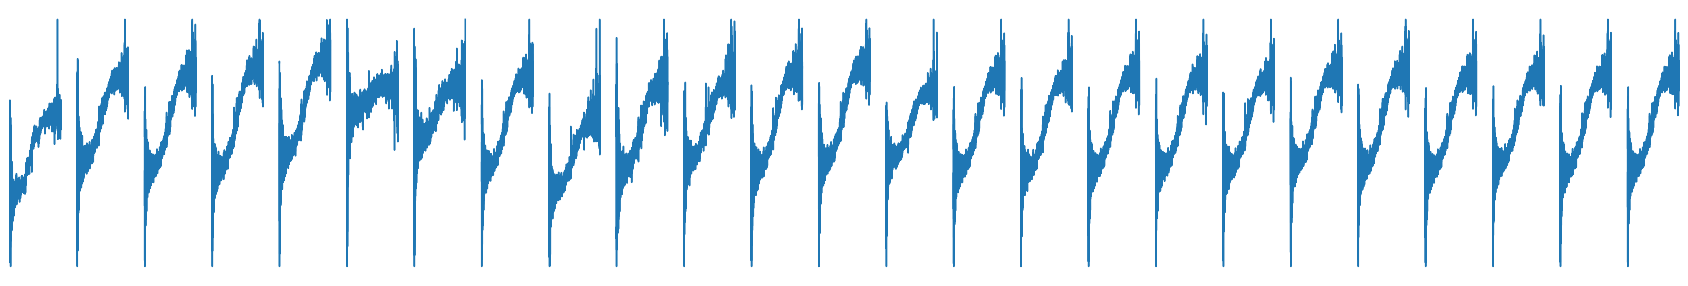

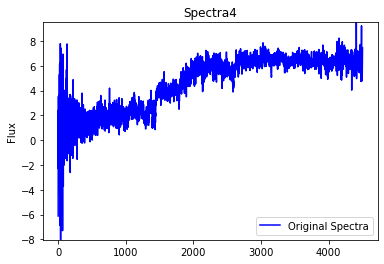

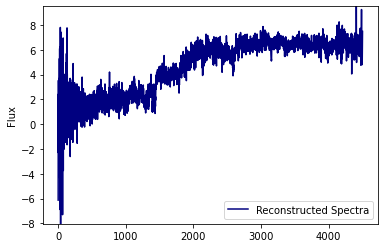

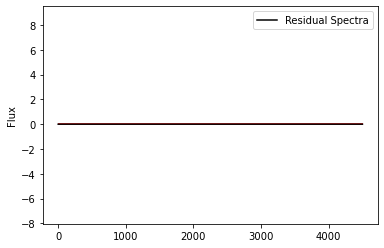

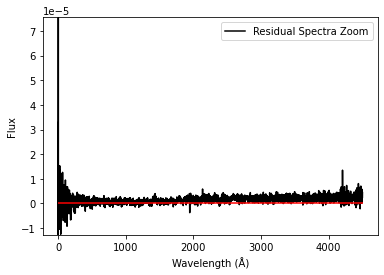

5
Coeffs [-4.0494034e+01 -2.1127417e+00  2.4375989e+00  3.4373193e+00
  2.9589953e+00  5.0412254e+00 -2.8811965e+00 -2.6925018e+00
  1.7993202e+01  2.0543869e+01  1.4036865e+01 -1.9050072e+01
  2.6041351e+01 -3.1994700e+00  7.8560429e+00  8.1402435e+00
  1.6558379e+00 -1.5247956e+01  5.7995234e+00  2.2716732e-01
  3.6534197e+00  2.3409618e-02 -1.3797936e-01 -4.9211767e-01
  8.6772534e-06]


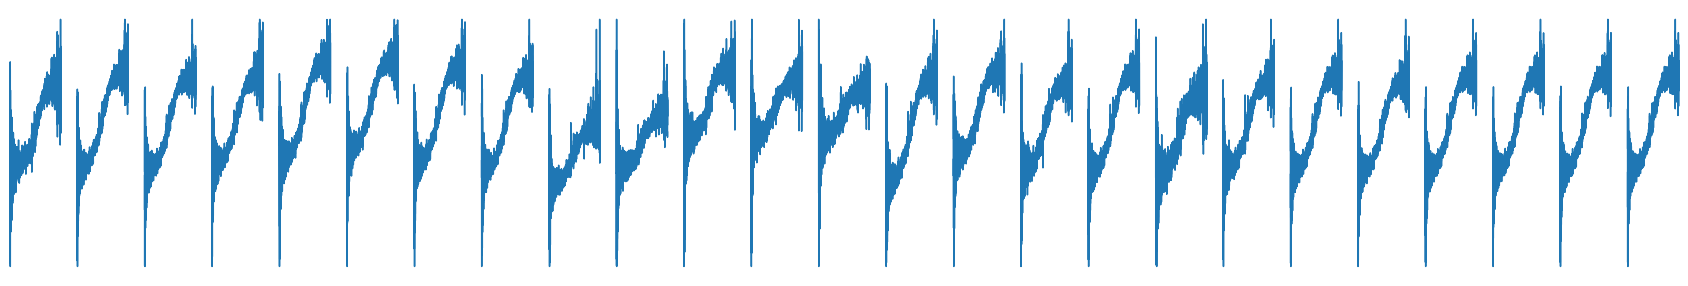

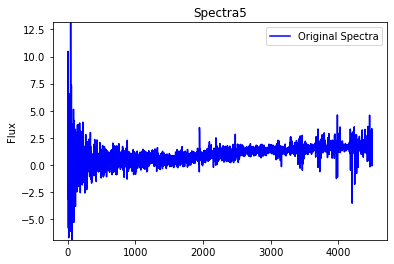

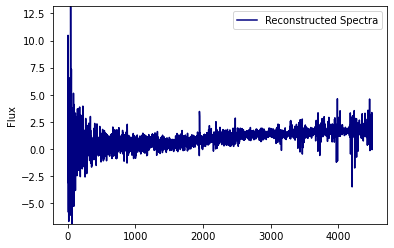

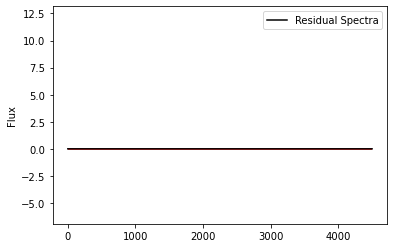

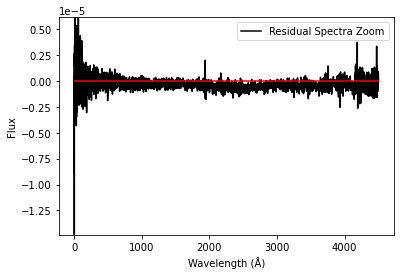

6
Coeffs [-9.8124657e+01  1.0446296e+01 -1.7948242e+00 -3.1060401e-01
 -4.8011618e+00 -1.2360878e+00 -9.5079699e+00 -8.5695667e+00
  4.5909820e+00 -1.7466457e+00 -3.3595886e+00  3.3077457e+00
 -7.4462638e+00 -8.0677519e+00  6.3321385e+00  2.0526761e-01
  7.3771729e+00 -5.9830151e+00 -1.2763971e+01 -1.5760890e+01
  4.6084791e-01  2.5280762e+01 -4.8775620e+00  6.2499738e+00
  8.6772598e-06]


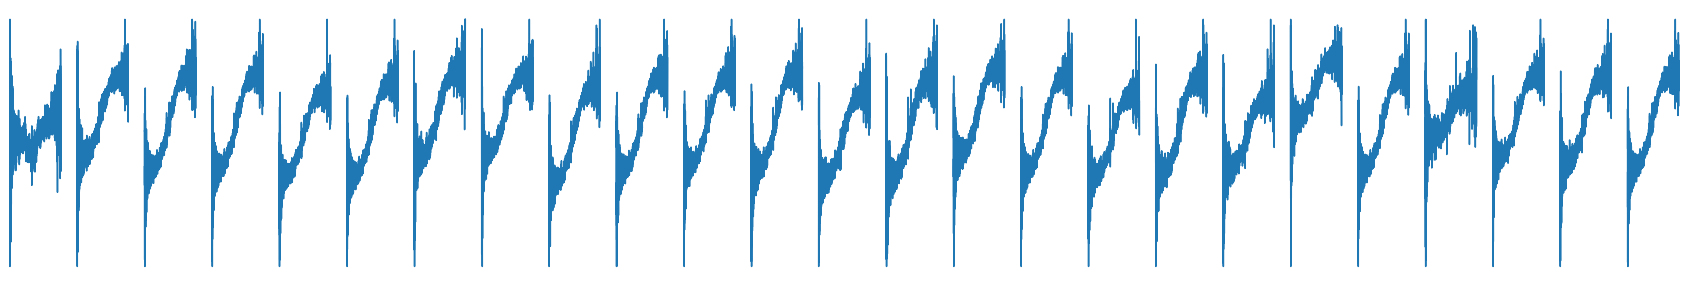

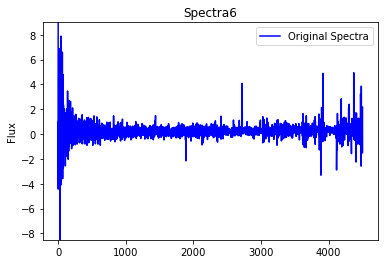

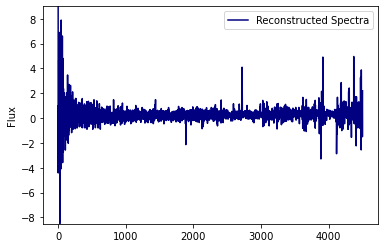

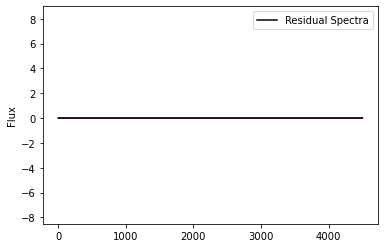

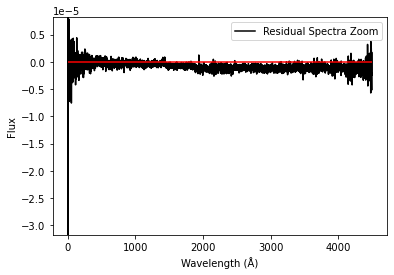

7
Coeffs [-7.4807045e+01  2.4704430e+01  1.9166239e-01  6.6253772e+00
 -1.6624830e+01 -4.1564493e+00 -1.5812841e+01 -2.1557865e+00
  5.6485667e+00 -7.2050438e+00 -2.3354750e+00  6.8293810e+00
 -1.7820311e+00 -5.4360280e+00  8.2724148e-01  9.8938161e-01
 -3.7628716e-01 -4.4769115e+00 -4.0247936e+00  6.8281918e+00
  6.1943145e+00 -5.5673852e+00  2.8105925e+01  1.3794804e+00
  8.6772534e-06]


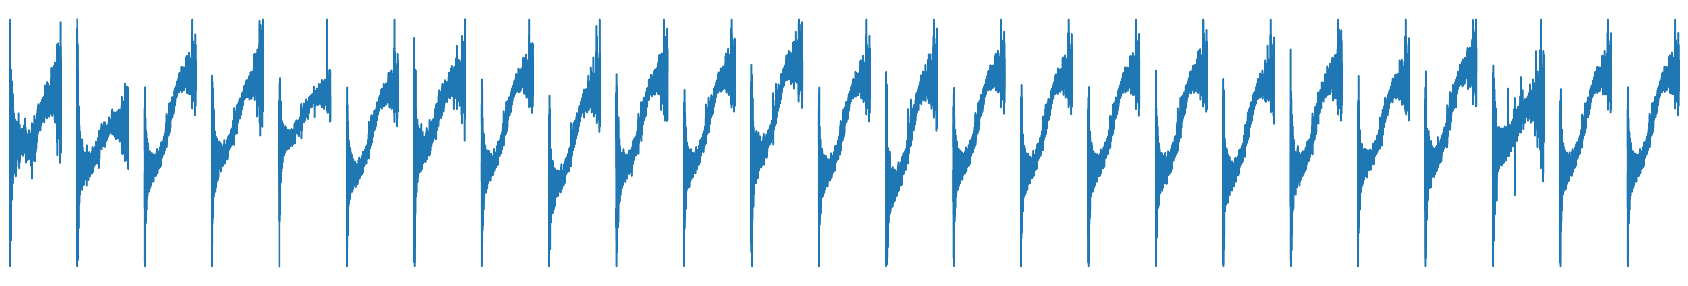

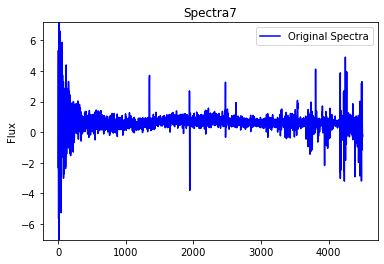

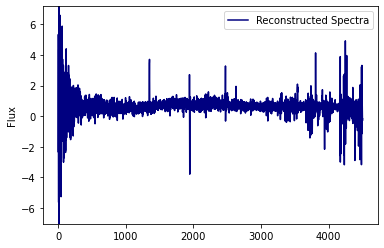

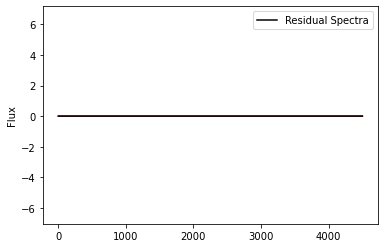

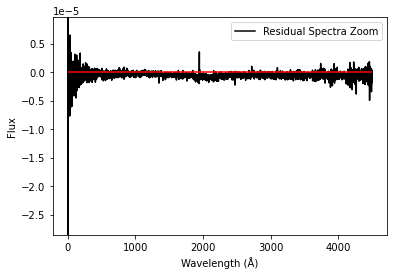

8
Coeffs [-4.4156387e+01 -1.3610135e+00 -2.6857626e-01 -8.4120140e+00
 -5.6560283e+00 -5.0016756e+00  5.6558161e+00 -2.8059390e+00
 -5.5339608e+00 -3.6228592e+00 -2.0966417e+01  8.3766470e+00
  8.8119850e+00 -1.5034204e+01 -9.0362425e+00 -1.8719314e+00
  2.3037537e+01 -5.1556234e+00  2.1525440e+01  3.1828767e-01
 -3.7698269e+00 -2.0905957e+00 -2.8437083e+00 -5.5526692e-01
  8.6772525e-06]


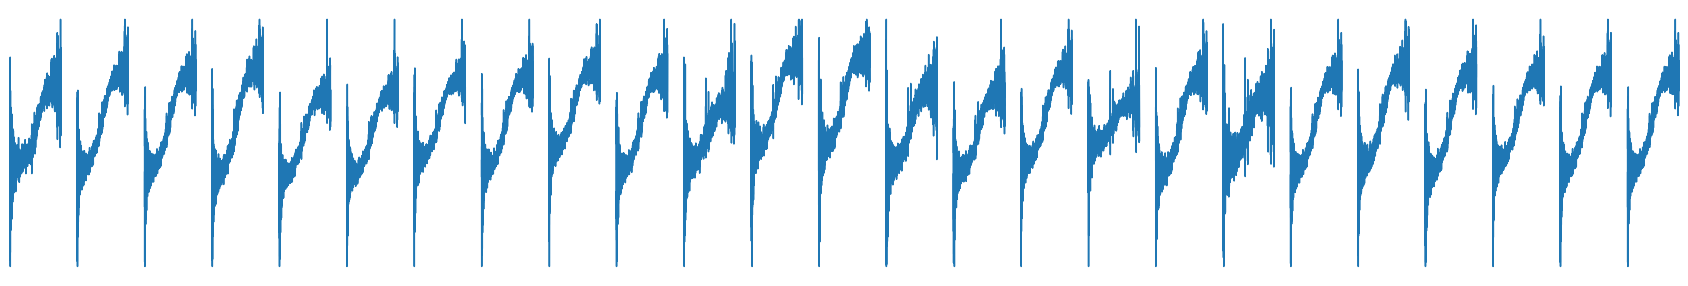

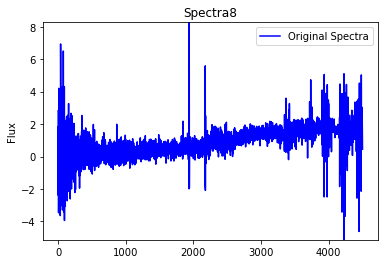

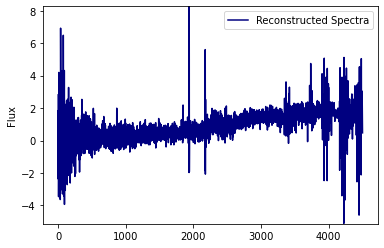

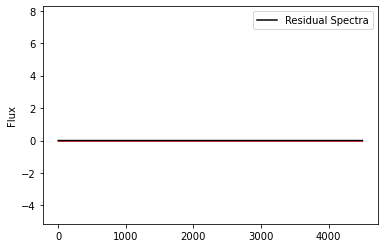

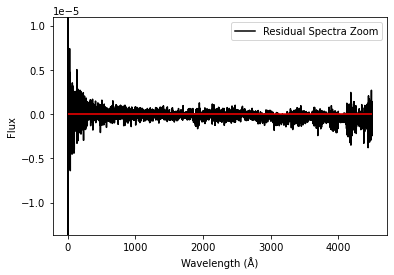

9
Coeffs [-5.9147198e+01  1.9056305e+01  6.6928396e+00  1.2282733e+01
 -1.8801901e+01  3.5419697e+01  3.4696217e+01  1.1864288e+01
 -6.2638731e+00  7.9119773e+00  1.1845458e+01  4.9729404e+00
 -5.7013655e+00  1.6246400e+00 -3.2123516e+00 -5.2869511e+00
  5.8205619e+00  8.4059000e-01 -1.0746195e+00  1.6508533e+00
  3.1521931e+00  1.7042603e+00  8.7921685e-01  1.5703634e+00
  8.6772607e-06]


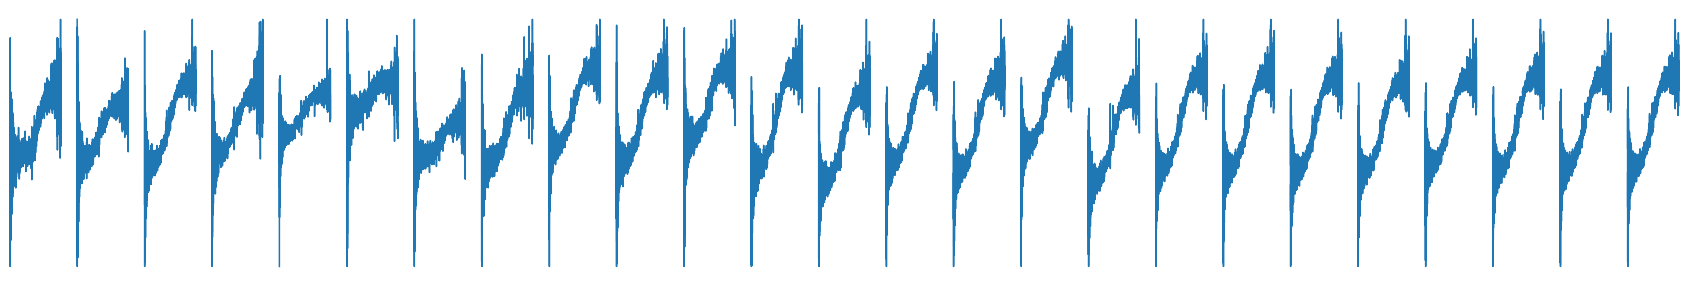

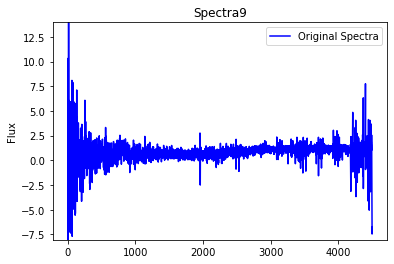

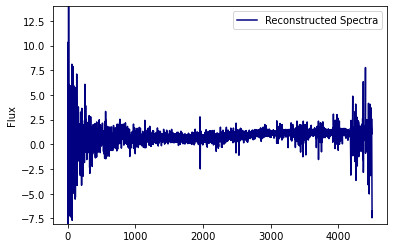

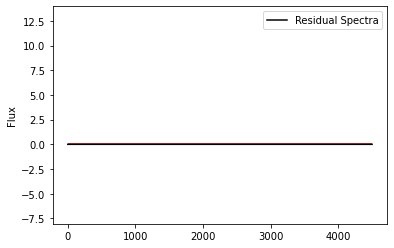

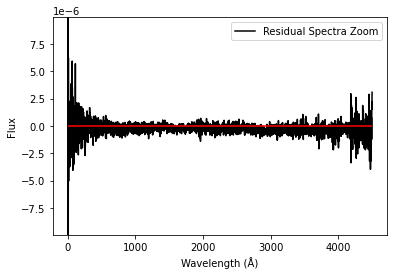

10
Coeffs [-2.3798035e+01 -4.2839246e+00 -1.0692834e+00 -1.1513868e+01
 -9.6737731e-01 -1.0473494e+01  1.2070702e+00  3.7822938e+00
 -6.0363114e-01 -7.9319406e+00  1.1621699e+00 -1.4287729e+01
 -2.3028717e+00  2.6601410e+01 -1.4975925e+01  4.1644492e+00
  2.1019781e+01 -7.4025335e+00 -1.4590173e+01  3.1591015e+00
 -4.4392171e+00 -2.9042292e+00  3.9045885e-01 -2.2421129e+00
  8.6772507e-06]


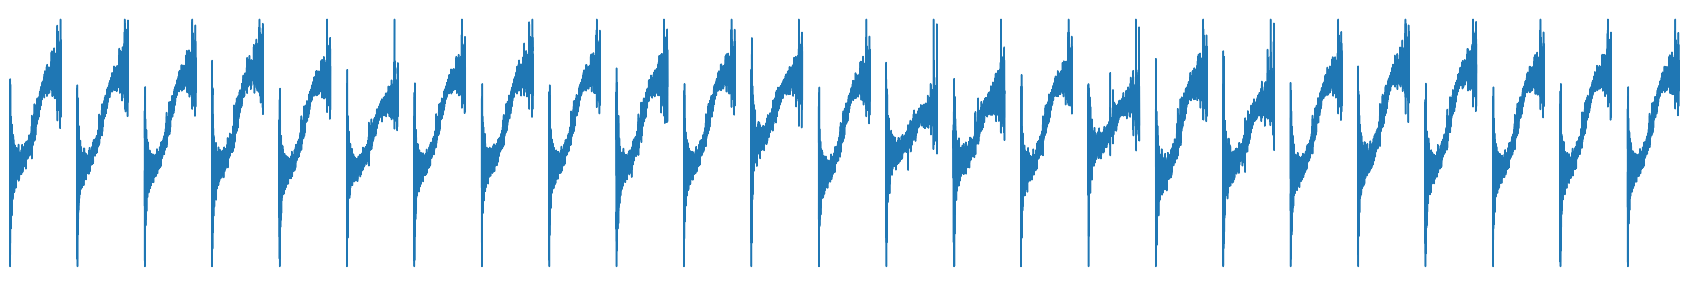

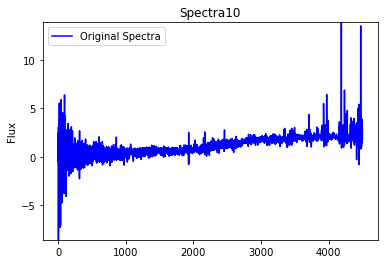

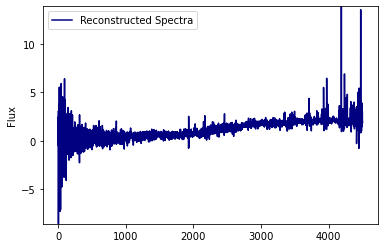

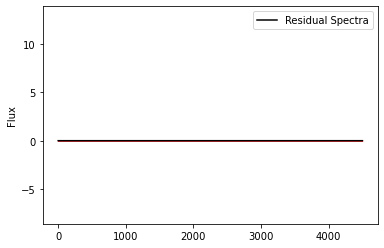

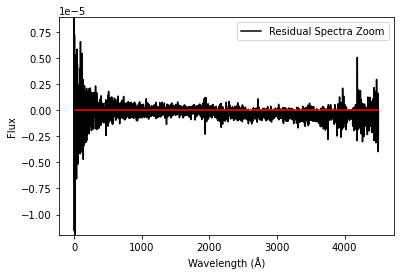

11
Coeffs [-3.2551525e+01 -5.0166254e+00 -2.7982285e+00 -7.2322855e+00
 -2.5190165e+00 -1.9341539e+00  4.1835303e+00 -7.4020624e+00
  1.5931754e-01 -4.2049222e+00  6.8037826e-01 -2.2086866e+00
  5.9057250e+00 -1.2259688e+00  6.7945518e+00  4.2346058e+00
  2.3415997e+00  1.4655558e+01 -5.3341689e+00 -8.8795328e+00
  2.3332644e+00 -1.6077581e+01 -3.3525362e+00  2.5578960e+01
  8.6772570e-06]


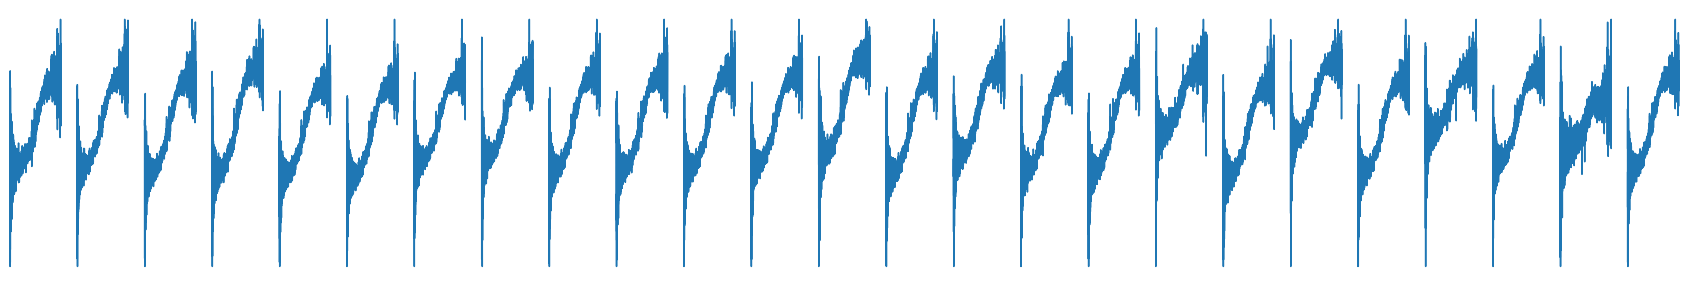

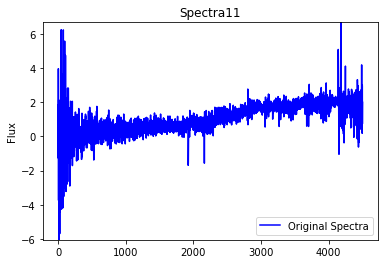

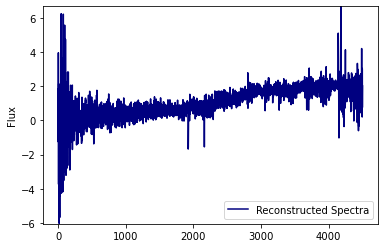

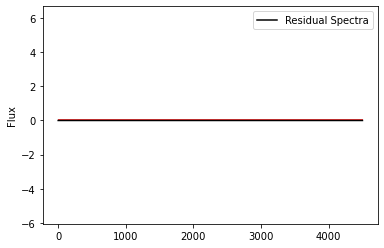

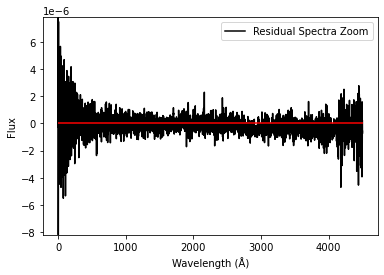

12
Coeffs [-2.1555422e+01 -4.1223953e+01 -5.8760670e+01  3.9832817e+01
  2.5200171e+00  3.6030400e+00 -7.2004509e-01  2.4882209e+00
 -3.6203752e+00 -6.5006361e+00 -1.0639604e+00 -2.8875501e+00
 -2.7592468e+00 -3.2230476e-01 -1.2855707e+00  2.4348727e-01
 -7.7886623e-01 -8.5931951e-01  1.7664421e+00 -1.8926060e-01
  1.5481992e+00  7.8006923e-01  1.5850953e+00 -3.6185727e-01
  8.6772552e-06]


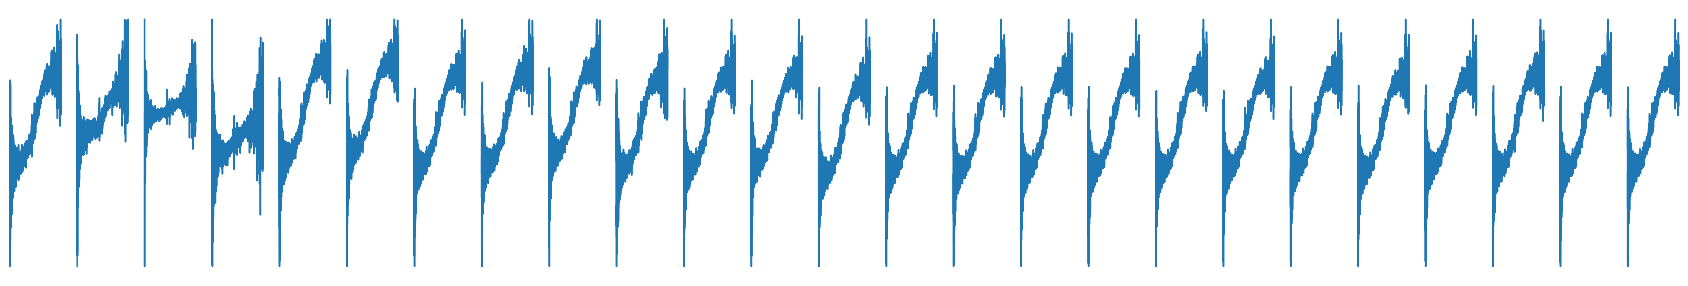

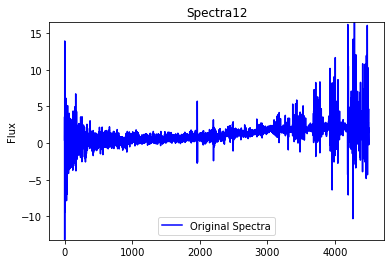

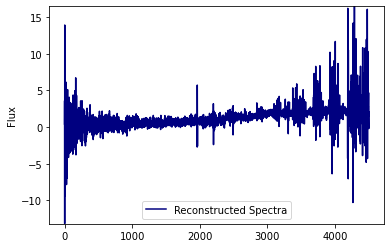

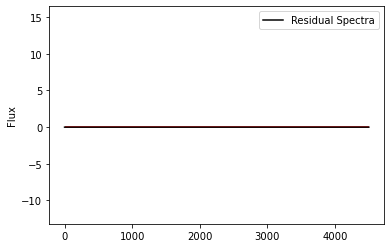

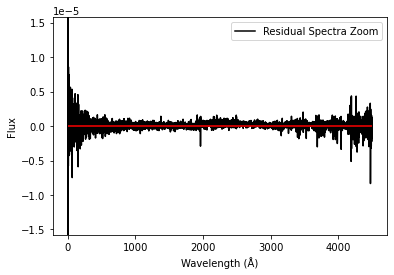

13
Coeffs [ 3.5080647e+01 -1.2436694e+01 -2.5411597e-01 -2.0695904e+01
  7.3537583e+00  8.8080330e+00  9.1828184e+00 -1.7637691e+01
 -9.7756224e+00 -8.4055729e+00  3.1341116e+00 -1.3827674e+01
  4.7340522e+00 -1.6725414e+01 -1.9896793e+01 -1.2429630e+01
 -1.5762340e+01 -5.1709099e+00 -7.6944571e+00 -5.7827485e-01
 -6.4766488e+00  1.2735258e+00  5.0598087e+00 -3.0304577e-02
  8.6772534e-06]


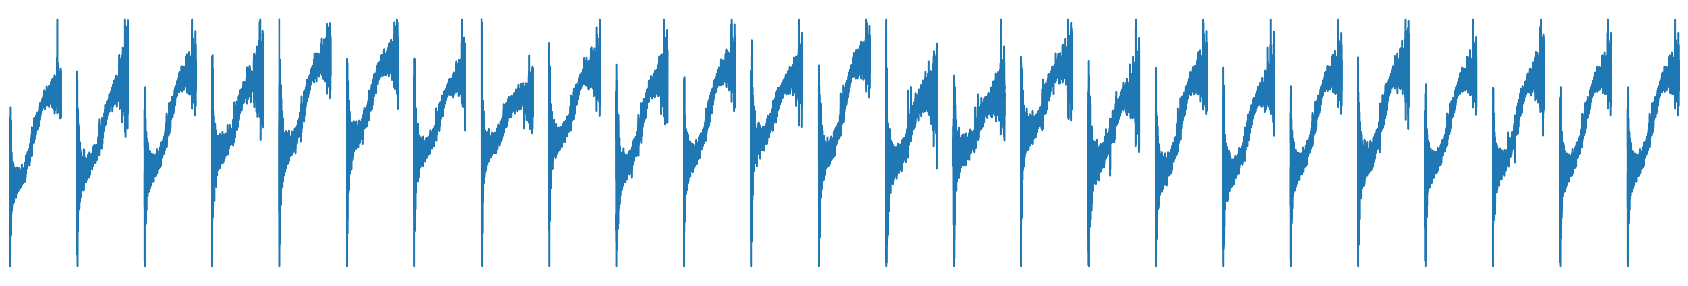

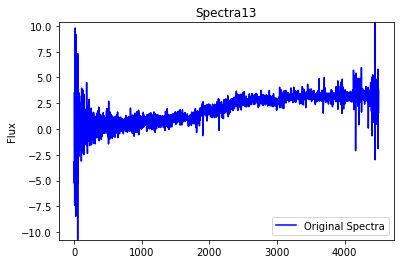

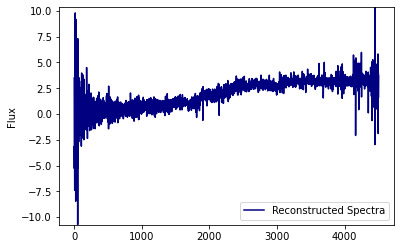

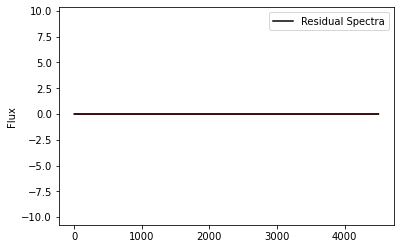

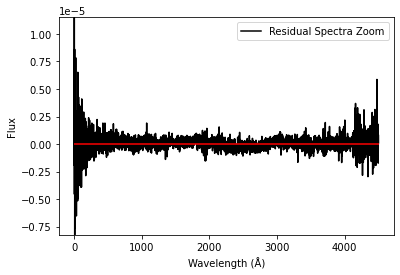

14
Coeffs [-9.5217237e+00 -1.5754222e+01 -1.8724213e+00 -8.7392178e+00
  6.6128497e+00 -6.5166140e+00  1.4822830e+01  1.2849298e+01
  3.5737118e+01  1.7381458e+01 -2.1147310e+01  7.2250590e+00
 -7.1864710e+00 -4.0776260e-02 -3.4785755e+00 -5.7461457e+00
 -8.5018663e+00  1.5671519e+00 -7.0238352e+00  2.5477304e+00
 -3.4072547e+00 -1.4992546e+00  1.0118034e+00  1.0292206e-01
  8.6772561e-06]


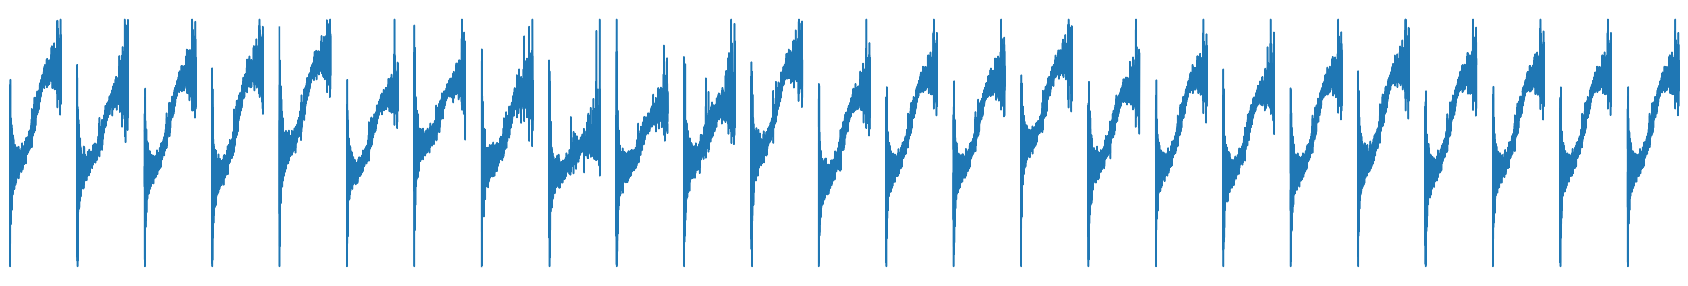

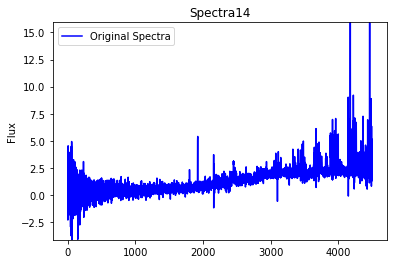

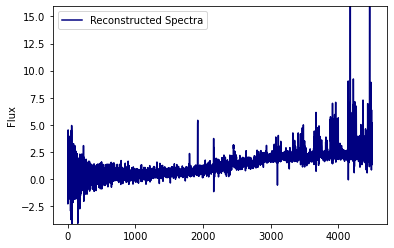

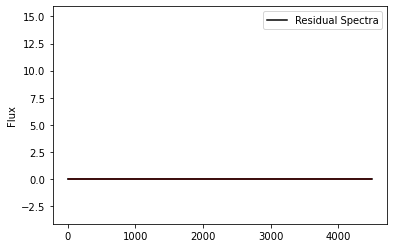

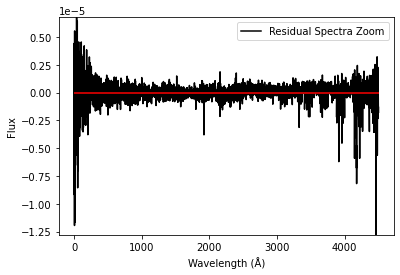

15
Coeffs [ 3.57227859e+01 -1.50546446e+01  5.12205505e+00 -1.13210659e+01
 -1.83137834e+00 -3.28663611e+00 -2.25705376e+01  4.12322426e+01
 -1.21882515e+01  8.62938213e+00  1.32675171e+01  8.05325603e+00
  3.34786129e+00 -8.64318275e+00 -9.56252289e+00  7.83129990e-01
 -1.53325629e+00  1.76134276e+00 -1.05810833e+00 -2.06612492e+00
 -4.41778803e+00  1.94755793e+00 -2.38643989e-01  4.41926384e+00
  8.67725794e-06]


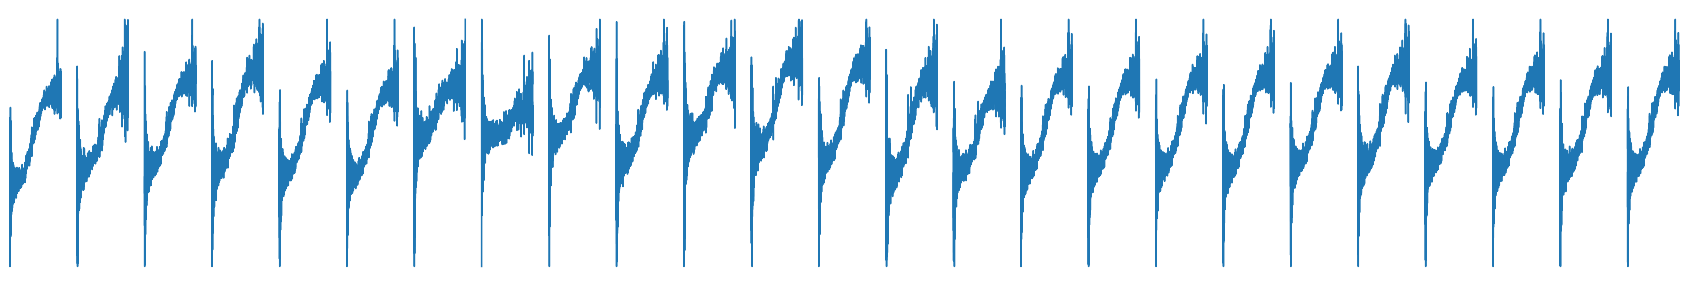

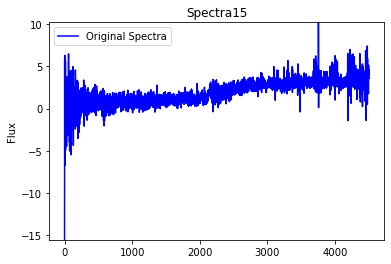

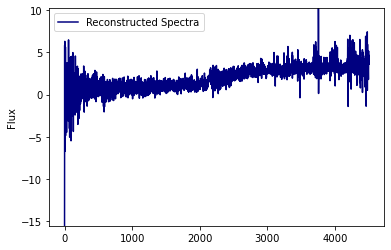

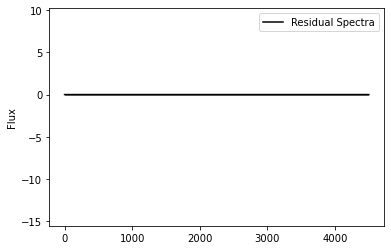

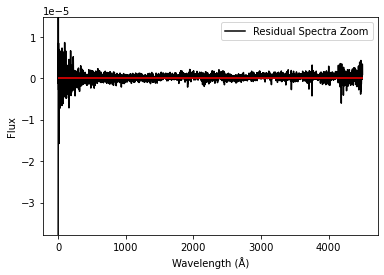

16
Coeffs [ 5.9834877e+01  5.8482998e+01 -1.7909040e+01  1.5728359e+01
  4.2971424e+01 -1.0152908e+01  2.2715046e+00  4.7466278e+00
 -9.0177393e+00  8.6870909e+00 -4.2139797e+00 -2.1729596e+00
  2.6900074e+00 -1.6006457e+00 -4.2463837e+00 -2.2228675e+00
 -6.9359541e-02  3.2643633e+00 -2.5330148e+00 -3.0195397e-01
 -3.6886594e-01 -1.4689295e+00 -1.7535918e+00  3.4546971e-01
  8.6772561e-06]


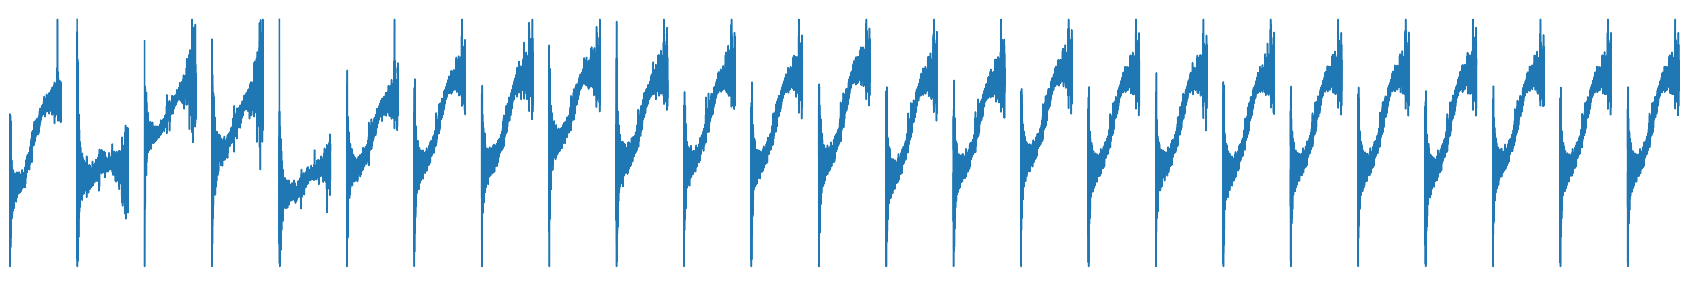

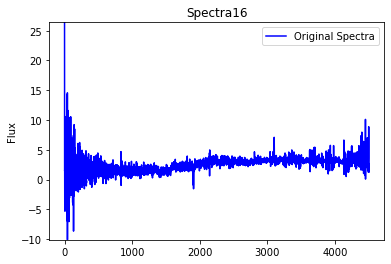

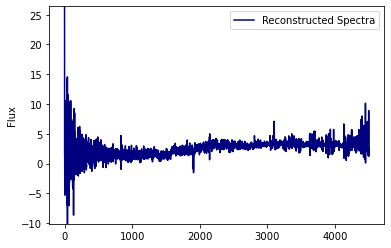

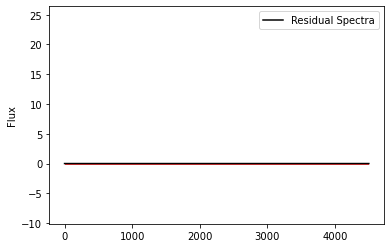

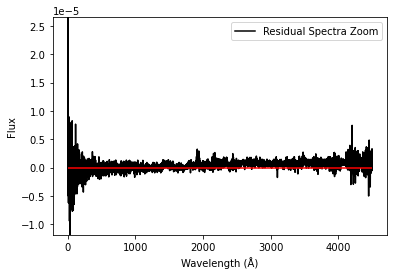

17
Coeffs [-9.3940407e+01  1.3620471e+01  1.3254333e+00  7.0557103e+00
 -1.4849395e+01  3.1358056e+00 -1.1080601e+01 -2.5798824e+00
 -1.0979619e+00 -4.6862402e+00 -2.6598828e+00 -2.8479609e+00
 -7.0065985e+00 -1.1293903e+01  6.4563527e+00  7.1533685e+00
 -5.3313627e+00 -3.1684358e+00 -8.3991842e+00  2.3037237e+01
 -1.0805823e+01 -6.0786204e+00 -1.7020052e+01 -1.6437612e+00
  8.6772607e-06]


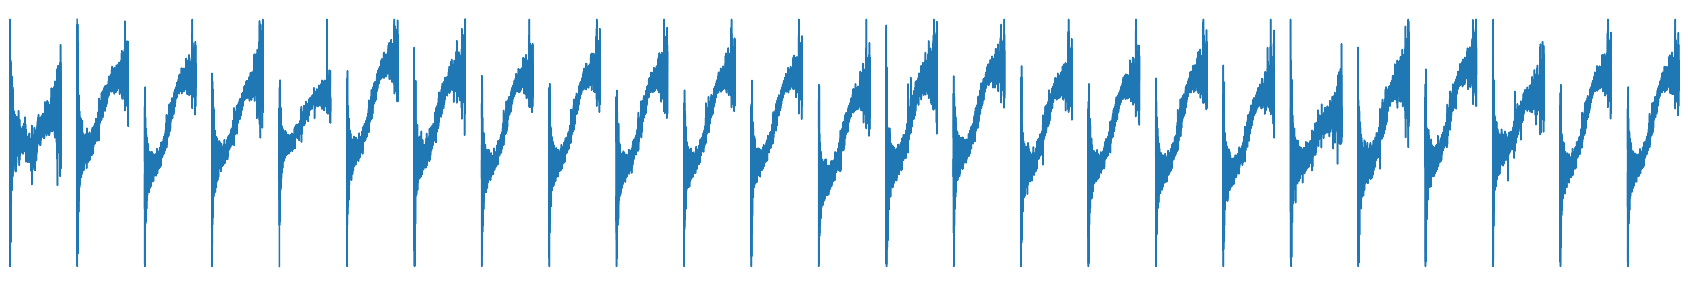

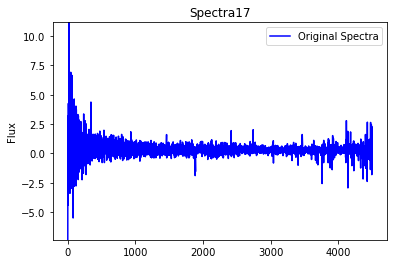

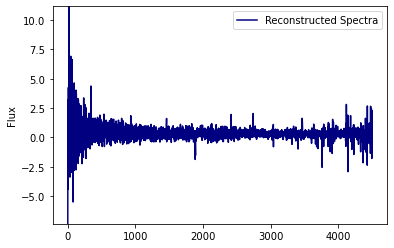

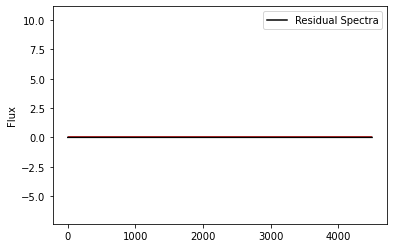

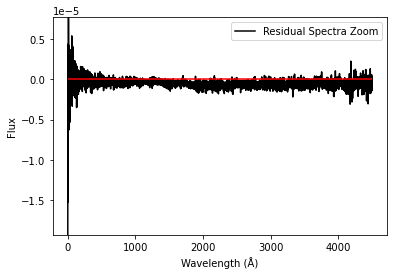

18
Coeffs [ 4.4693977e+01 -5.3575211e+00 -8.6362839e+00 -1.8509905e+01
  2.2831736e+01 -8.1030560e+00  1.0125814e+01 -3.1796873e+00
  1.6384100e+01 -2.0270208e+01  2.7393705e+01  1.5699741e+01
 -7.2940607e+00 -6.6550093e+00  7.5447497e+00  1.5119298e+00
  7.0453792e+00 -6.5740407e-01  3.6723962e+00  6.1352797e+00
  3.8973615e+00  9.7040618e-03 -1.4261804e+00 -3.9546745e+00
  8.6772579e-06]


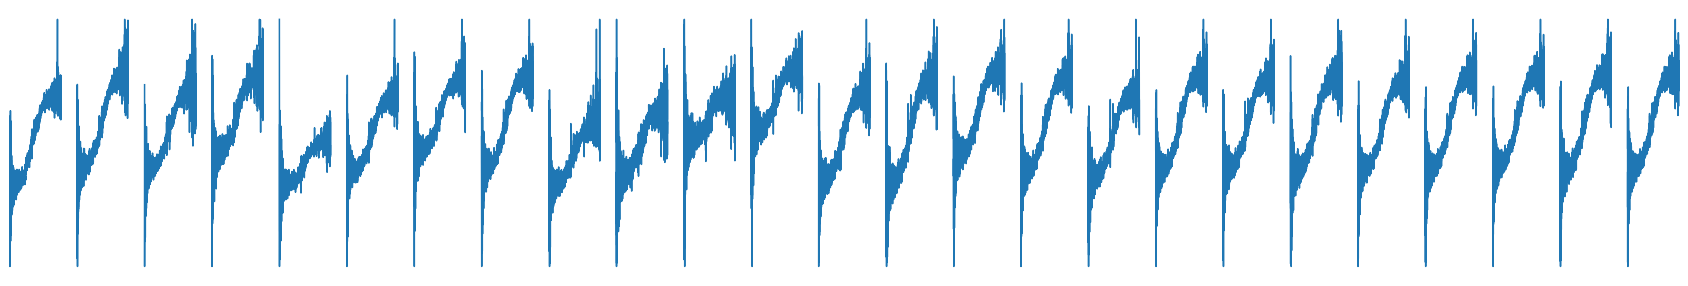

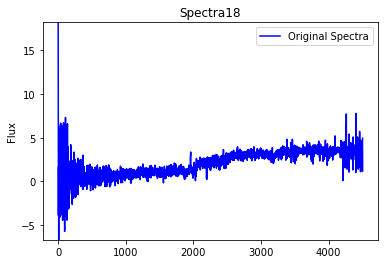

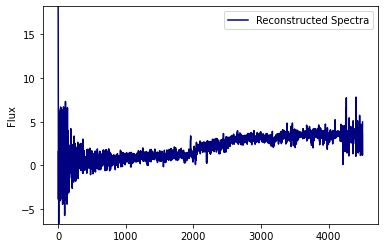

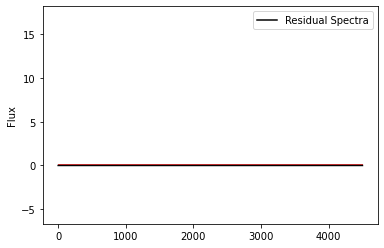

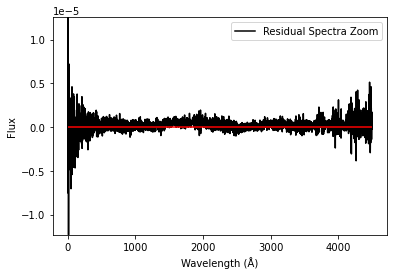

19
Coeffs [-6.2881462e+01  4.7382407e+00  4.4701862e+00 -2.2589307e+00
  2.3614969e+00 -3.3405802e+00  6.0301304e+00 -5.6863971e+00
 -2.9338539e+00  1.9102863e+00  2.9204774e+00  1.6878934e+00
 -1.3829028e+01  1.0528704e+01 -6.1086731e+00  2.5859739e+01
 -1.5264117e+01 -3.6416924e+00  1.7118654e+01 -6.5264378e+00
 -1.3992977e+01  2.9878521e+00  3.9689119e+00  3.4575377e+00
  8.6772616e-06]


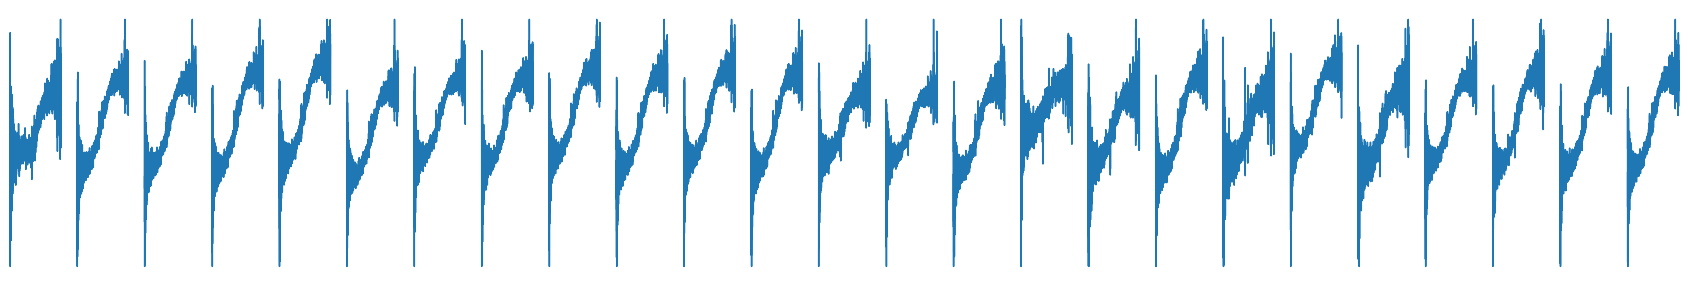

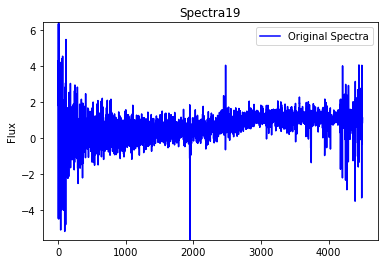

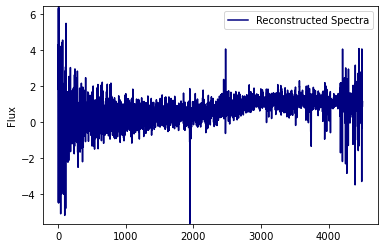

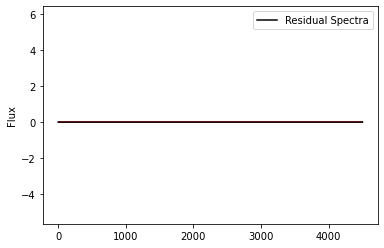

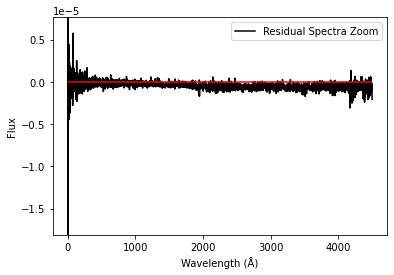

20
Coeffs [-5.7553524e+01  2.7739151e+00  1.0408332e+01  7.4113828e-01
  1.0678854e+00 -1.7912830e+00 -9.5262909e+00  5.1251144e+00
 -1.5586494e+00 -2.2584085e+00  1.8622556e+00 -1.0068803e+01
 -1.9024307e+01  4.5786657e+00  1.1888072e+01 -2.3115358e+01
 -3.5010703e+00 -1.3773314e+01  9.6220484e+00 -1.3280434e+01
  2.0894746e-01 -1.2540277e+01 -3.7609951e+00 -2.8654017e+00
  8.6772561e-06]


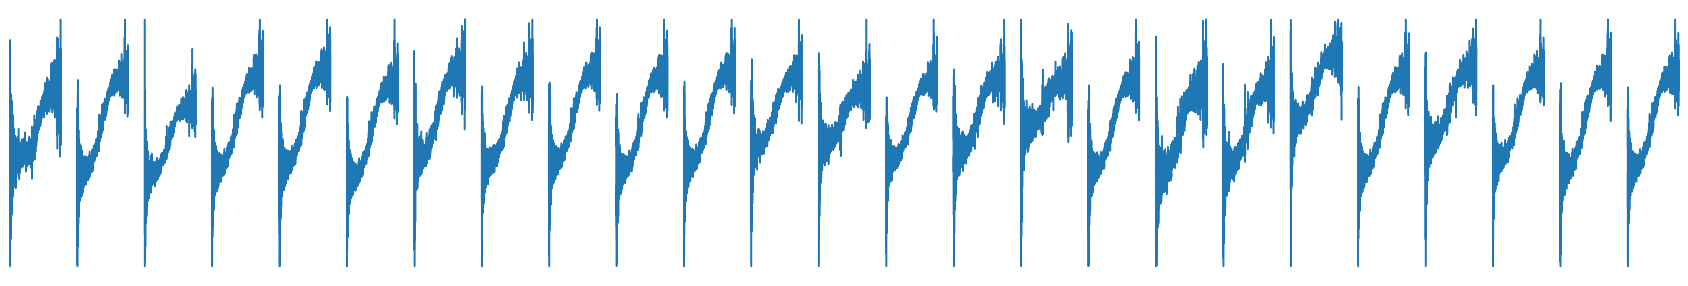

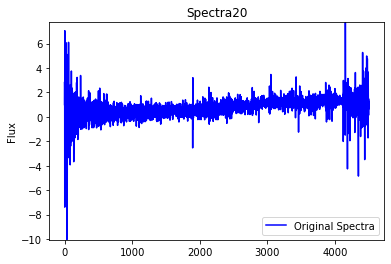

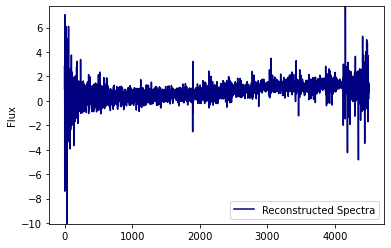

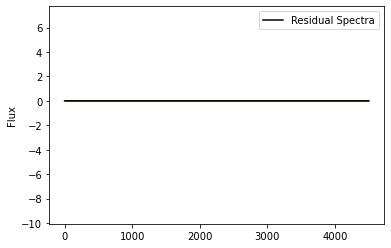

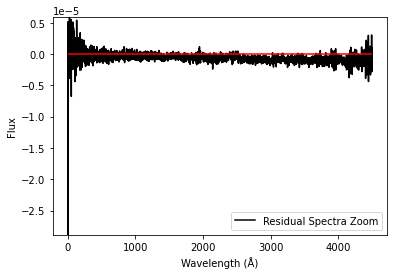

21
Coeffs [ 3.4980453e+02  7.4406939e+00  3.6476886e+00  1.2998154e+01
 -3.2874664e+01 -2.5065460e+01  1.0443513e+01 -2.3688056e+00
  5.3654444e-01  1.7879871e+00  2.5461278e+00 -4.7388639e+00
 -2.9903395e+00 -4.2317553e+00  2.4675059e+00  1.4005105e+00
 -6.5286815e-01 -1.9086338e+00 -1.9534543e-01 -2.8235331e+00
 -3.1411299e-01  1.3590081e+00 -1.5835119e+00 -4.8470059e-01
  8.6772588e-06]


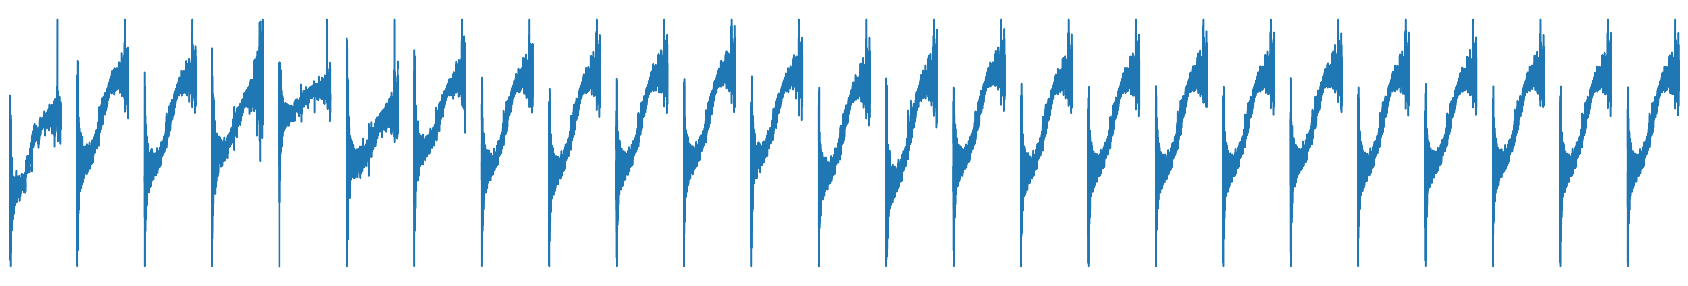

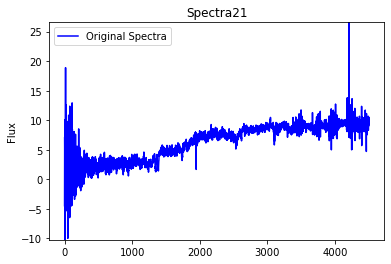

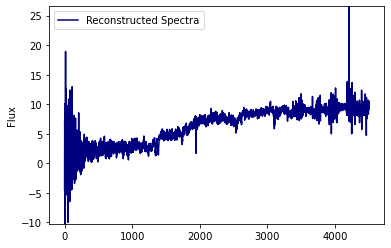

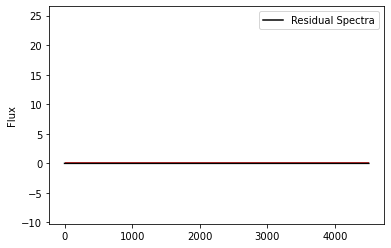

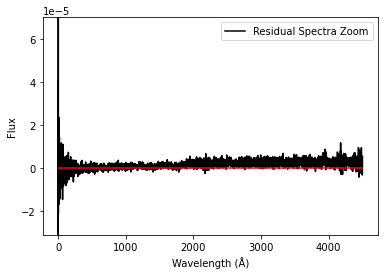

22
Coeffs [-6.66497269e+01  6.96373177e+00 -5.66429090e+00  5.15368414e+00
 -1.54669294e+01 -9.56276894e+00 -8.69203854e+00 -1.68899860e+01
  1.28777075e+00  5.61412525e+00  8.66679764e+00  2.44265366e+01
  1.68829994e+01  1.74661350e+01 -1.04367199e+01 -1.41338005e+01
 -9.57340240e+00  2.76863647e+00  1.59998119e+00 -1.28224611e+00
 -5.74424267e-01 -2.62177676e-01 -7.58606434e+00 -2.88676834e+00
  8.67726158e-06]


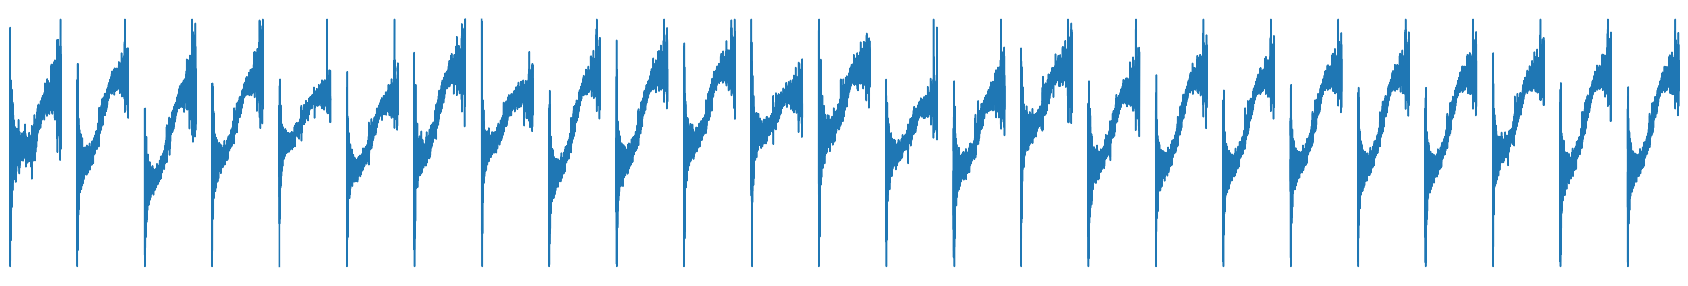

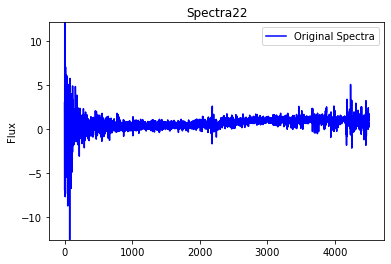

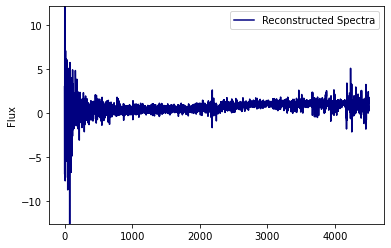

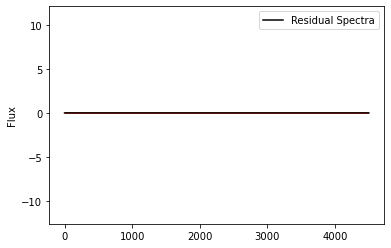

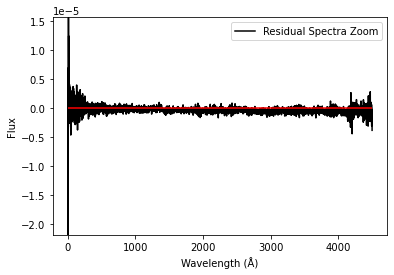

23
Coeffs [-6.28674850e+01 -2.02409720e+00  7.09014177e-01 -6.18837881e+00
 -5.33878756e+00  1.22170198e+00  1.90828884e+00 -7.40503848e-01
 -5.36951780e+00  1.50704312e+00 -3.37076163e+00  1.52865624e+00
  2.15255117e+00 -8.10967064e+00  1.08160853e+00  1.53343210e+01
 -1.23677361e+00  1.07179565e+01 -9.61777306e+00 -1.68054676e+01
  8.36096573e+00 -1.03498125e+01 -2.42646980e+00 -2.21125298e+01
  8.67725612e-06]


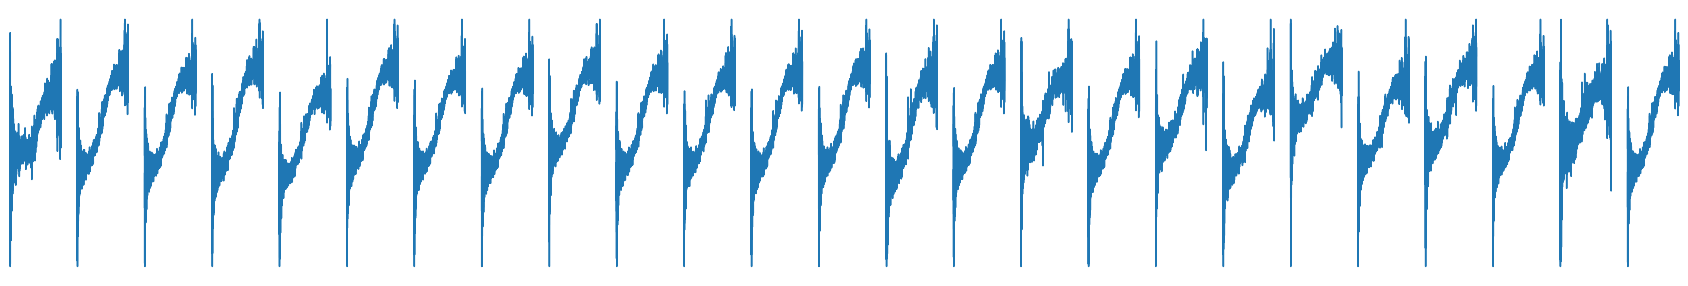

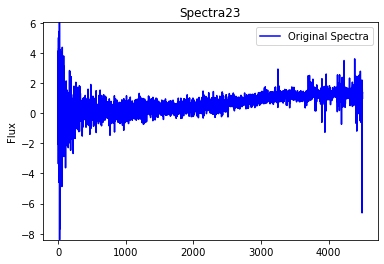

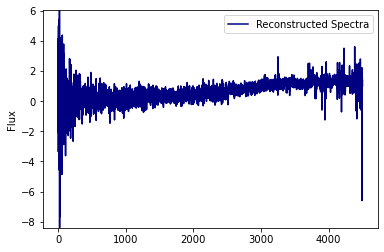

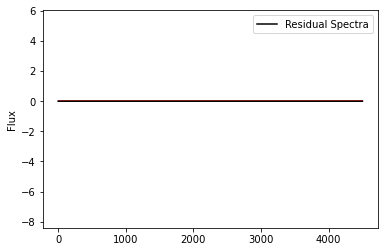

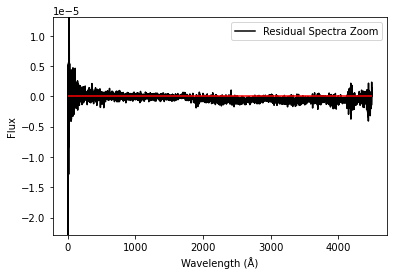

24
Coeffs [ 8.01594391e+01 -2.37347813e+01  4.92518097e-01 -1.36076899e+01
  1.09171610e+01  5.38513613e+00 -6.21132040e+00 -2.00720119e+01
 -2.05386295e+01  3.12830467e+01 -9.45339262e-01  8.12866879e+00
 -1.15618143e+01  3.21533418e+00  1.08470774e+01 -1.73099980e-01
  7.62576866e+00 -1.54733077e-01 -3.02017641e+00  8.75088787e+00
  2.30314755e+00 -1.23882644e-01  4.86176586e+00 -2.23804176e-01
  8.67725976e-06]


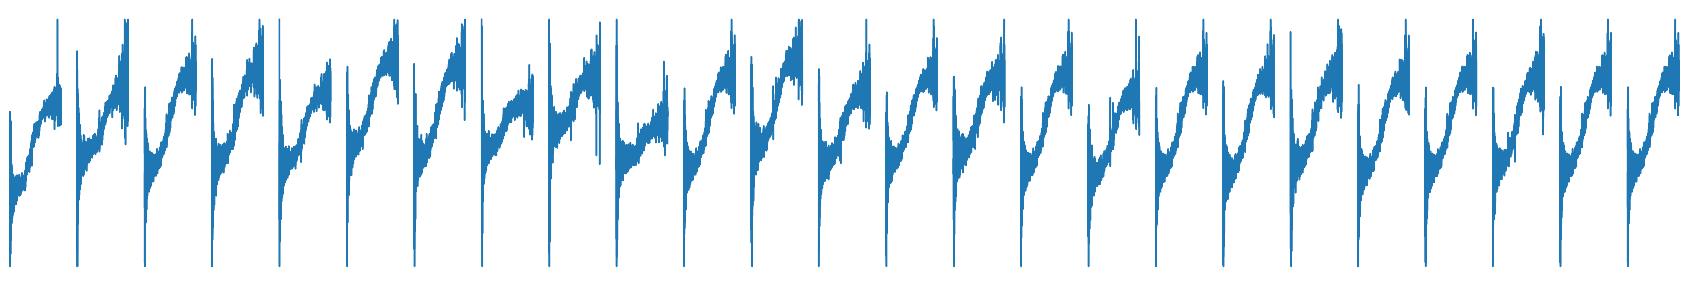

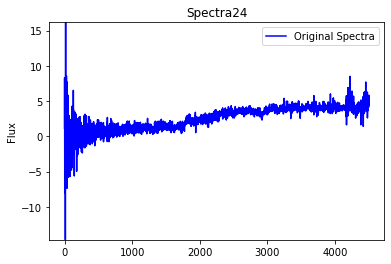

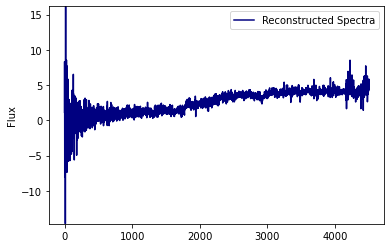

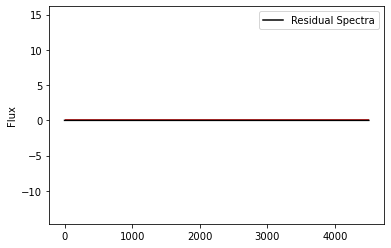

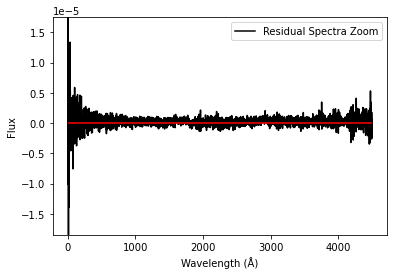

In [27]:
%matplotlib inline
rec_tot = np.zeros((25, 4500))
# rec_let = show_pca_spectra(Xproj, pca_comps, let_idx = 1)
for i in range(25):
    
    show_pca_spectra(Xproj, pca_comps, let_idx = i)
    
    rec_let = rec_letFun(Xproj, pca_comps, let_idx=i)
    rec_tot[i]=rec_let[0]
#     rec_tot.append(rec_let[0])
#     rec_mean.append(rec_let[0]/(i+1))
    plt.title('Spectra'+str(i))
    plt.plot(X[i], label='Original Spectra', c='blue')
#     plt.plot(Xmean, label='Mean')
    
    plt.ylabel('Flux')
#     plt.xlabel('Wavelength (Å)')
#     plt.ylim(-15, 20)
    plt.ylim(rec_let[0].min(), rec_let[0].max())
    plt.legend()
    plt.show()
    
    
    plt.plot(rec_let[0]+pca_comps[0], label='Reconstructed Spectra', color='navy')
#     plt.plot(Xmean, label='Mean')
#     plt.title('Reconstructed Spectra')
    plt.ylabel('Flux')
#     plt.xlabel('Wavelength (Å)')
    plt.ylim(rec_let[0].min(), rec_let[0].max())
#     plt.ylim(X[i].min(), X[i].max())
    plt.legend()
    plt.show()
    
   
    residual = np.zeros(4500)
#     for _ in range(len(X[i])):
#         residual.append(((X[i][_]) - (rec_let[0][_]))/2)
#     plt.plot(residual)
#     for j in range(4500):
# # #         if X[i][j]<0:
            
#         if X[i][j]<rec_let[0][j]:
#             residual[j]=(rec_let[0][j]-X[i][j])
#         if X[i][j]>rec_let[0][j]:
#             residual[j]=(X[i][j]-rec_let[0][j])
#         if X[i]<0:
#                 residual = residual/-1
    
    residual = ((X[i])-(rec_let[0]))
#     for j in range(4500):
#         if X[i][j]<0:
#             residual[j]=residual[j]/-1
#     if(X[i]<0):
#         residual = residual/-1
#     if (rec_let[0]<0):
#         residual = residual/-1
    plt.plot(residual, label='Residual Spectra', color='black')
#     plt.title('Residual Spectra ')
#     plt.plot( , label='Mean')
    plt.hlines(0, 0, 4500, colors='r')
    plt.ylabel('Flux')
#     plt.xlabel('Wavelength (Å)')
    plt.legend()
#     plt.ylim(-15, 20)
    plt.ylim(rec_let[0].min(), rec_let[0].max())
    plt.show()
    #zoom version
    plt.plot(residual, label='Residual Spectra Zoom', zorder=0, color='black')
    plt.hlines(0, 0, 4500, colors='r', zorder=2)
#     plt.plot(Xmean, label='Mean')
#     plt.title('Residual Spectra zoom')
    plt.ylabel('Flux')
    plt.xlabel('Wavelength (Å)')
    plt.legend()
#     plt.ylim(-15, 20)
    plt.ylim(residual.min(), residual.max())

    plt.show()
#     plt.plot(Xre[i])
#     plt.title('Original Residual Flux ')
#     plt.ylim(rec_let[0].min(), rec_let[0].max())
#     plt.show()